In [ ]:
# https://github.com/L-Lewis/Kickstarter-success-machine-learning/blob/master/Kickstarter-project.ipynb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sms
%matplotlib inline

import pandas as pd
import glob

## Combining data into single dataframe

In [2]:
path = r'data'
all_files = glob.glob(path + '/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

## Dealing with duplicates

In [4]:
# check for duplicate records
frame['id'].nunique()

182264

In [28]:
frame['name'].nunique()

181680

In [5]:
# state column should be our final predicted variable--what is in that column?
frame['state'].value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

In [6]:
# we want to drop any rows that don't have 'successful' or 'failed' state
a = ['successful', 'failed']
frame = frame[frame['state'].isin(a)]

In [31]:
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international


In [32]:
frame['state'].value_counts()

successful    117465
failed         75199
Name: state, dtype: int64

In [7]:
# drop duplicate records
frame = frame.drop_duplicates(subset = 'id', keep = 'first')

In [8]:
pd.set_option('display.max_columns', None)
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international


## Feature engineering

In [9]:
# converting the goal to usd
frame['usd_goal'] = frame['goal'] * frame['static_usd_rate']

In [10]:
# extracting category--we need the first part of what's in the 'slug' key

f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
frame['category'] = frame.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
frame['category'] = frame.apply(f, axis=1)

In [38]:
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal
1,47,A colorful Dia de los Muertos themed oracle de...,games,1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic,1000.0
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...",music,22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international,15000.0


In [9]:
frame['category'].value_counts()

music           24591
film & video    23889
art             18061
technology      17782
publishing      16997
food            13298
games           10735
fashion          8869
comics           6358
design           5883
photography      5689
crafts           5448
theater          4686
journalism       3684
dance            3009
Name: category, dtype: int64

In [11]:
# converting the date and time columns
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    frame[c] = pd.to_datetime(frame[c], origin='unix', unit='s')
print(f"The dataset contains projects added to Kickstarter between {min(frame.created_at).strftime('%d %B %Y')} and {max(frame.created_at).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 22 April 2009 and 04 March 2019.


What to get from the columns with time:

- these columns *may* have interesting information--such as the best month of the year to launch, or the best time of day. We can display this as graphs
- however, this stratification of the data (e.g. by month, or by time of day) may be inappropriate for the model--this can hide certain trends (e.g. looking at time of day alone--it seems like 12-2pm is the best time to launch; but is that also the case for the weekend?)
- we have to do more thinking about how to best include the timing information into the model exactly 
- for now (for our basic model) we will forego looking at the timing information--incorporate it later
- what we *will* do is get the duration of the campaign, into a separate column

In [42]:
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal
1,47,A colorful Dia de los Muertos themed oracle de...,games,1950,US,2017-08-02 14:28:13,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,2017-09-09 17:00:59,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,2017-08-10 17:00:59,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic,1000.0
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...",music,22404,US,2012-09-30 06:45:33,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,2013-06-12 05:03:15,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,2013-05-13 05:03:15,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international,15000.0


## Creating trimmed dataframe

In [12]:
# create a trimmed dataframe; 
cols_to_drop = ['blurb', 'converted_pledged_amount', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_type']
trimmed_frame = frame.drop(columns=cols_to_drop)

In [13]:
# Campaign length
trimmed_frame['campaign_days'] = frame['deadline'] - frame['launched_at']
trimmed_frame['campaign_days'] = trimmed_frame['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
trimmed_frame['launch_month'] = frame['launched_at'].dt.month_name()
trimmed_frame['year_month'] = pd.to_datetime(frame['launched_at']).dt.to_period('M')
trimmed_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168979 entries, 1 to 209221
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   backers_count  168979 non-null  int64         
 1   category       168979 non-null  object        
 2   country        168979 non-null  object        
 3   launched_at    168979 non-null  datetime64[ns]
 4   staff_pick     168979 non-null  bool          
 5   state          168979 non-null  object        
 6   usd_pledged    168979 non-null  float64       
 7   usd_goal       168979 non-null  float64       
 8   campaign_days  168979 non-null  int64         
 9   launch_month   168979 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 13.1+ MB


In [ ]:
# Optional
# Launch day of week
df['launch_day'] = df['launched_at'].dt.weekday_name
# Deadline day of week
df['deadline_day'] = df['deadline'].dt.weekday_name
# Launch month
df['launch_month'] = df['launched_at'].dt.month_name()
# Deadline month
df['deadline_month'] = df['deadline'].dt.month_name()

/Users/tobiastnc/neuefische/ds_project_2_ks/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


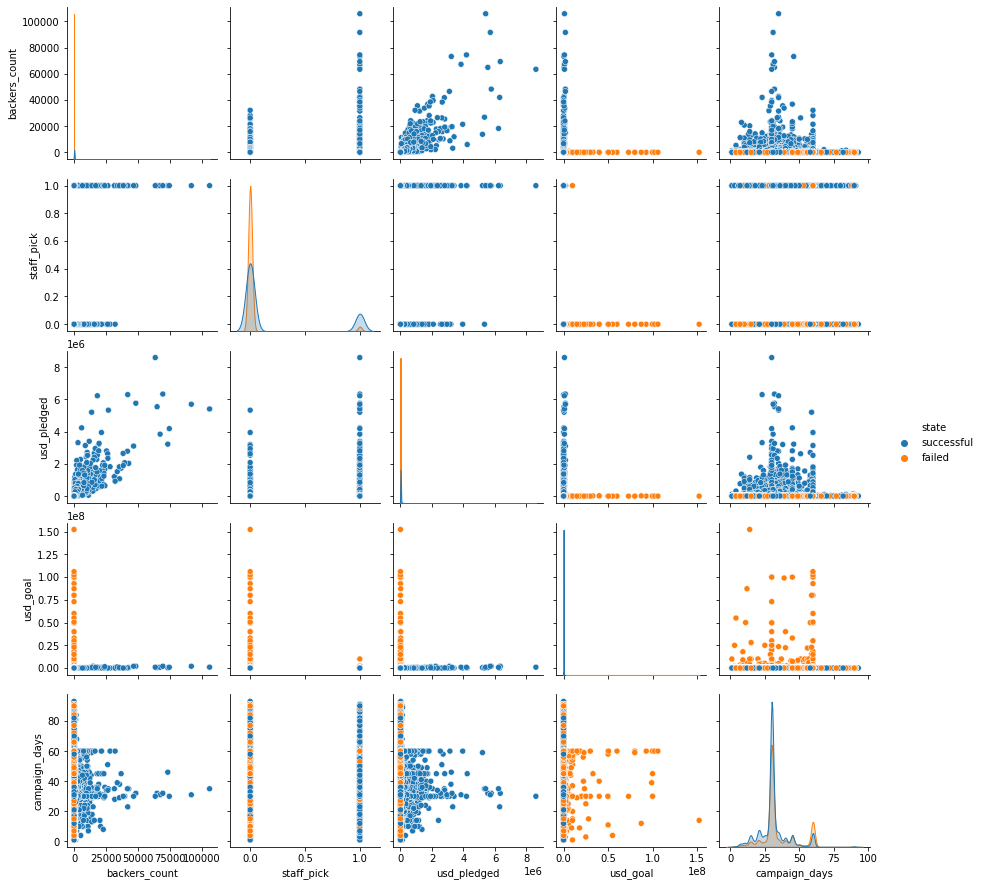

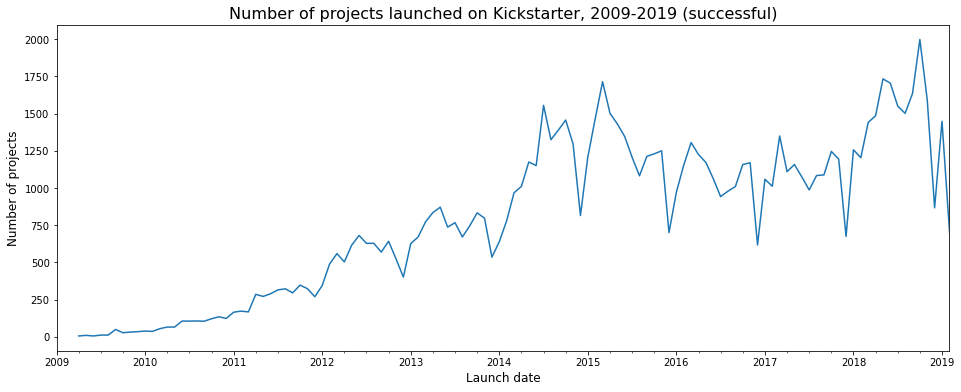

In [18]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
trimmed_frame[trimmed_frame['state']=='successful'].set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2009-2019 (successful)', fontsize=16)
plt.show()

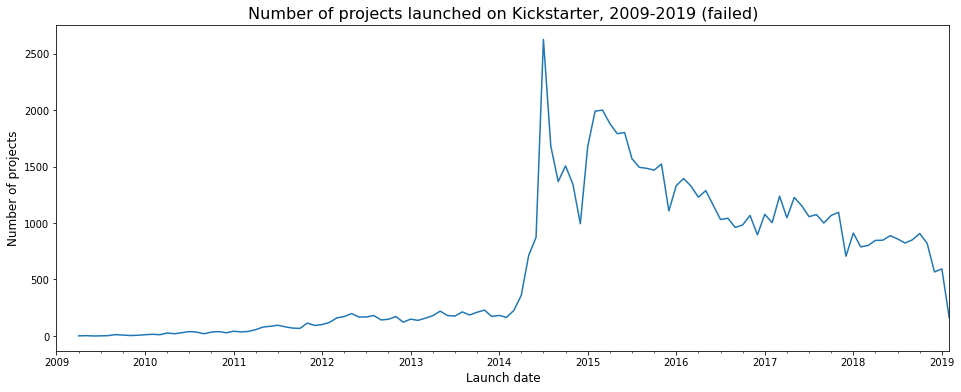

In [20]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
trimmed_frame[trimmed_frame['state']=='failed'].set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2009-2019 (failed)', fontsize=16)
plt.show()

In [32]:
(trimmed_frame[trimmed_frame['state']=='successful'].set_index('launched_at').category.resample('MS').count() / \
(trimmed_frame[trimmed_frame['state']=='successful'].set_index('launched_at').category.resample('MS').count() + \
 trimmed_frame[trimmed_frame['state']=='failed'].set_index('launched_at').category.resample('MS').count()) * 100).plot

launched_at
2009-04-01     83.333333
2009-05-01     75.000000
2009-06-01    100.000000
2009-07-01     91.666667
2009-08-01     78.571429
                 ...    
2018-11-01     65.990058
2018-12-01     60.460251
2019-01-01     70.910872
2019-02-01     81.931818
2019-03-01     81.250000
Freq: MS, Name: category, Length: 120, dtype: float64

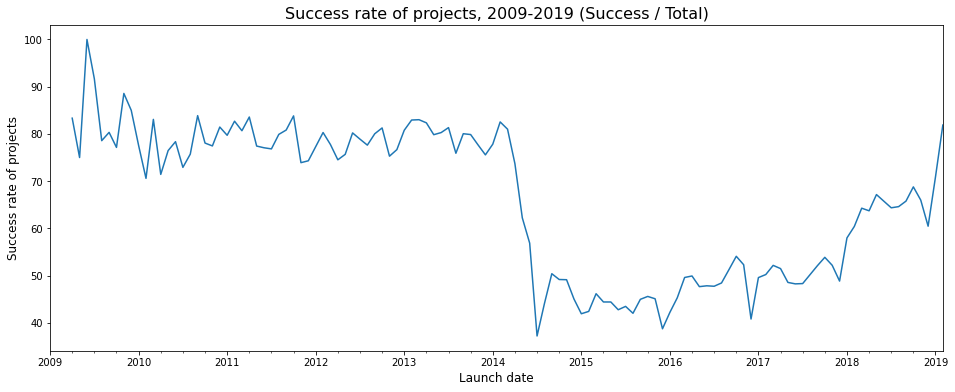

In [36]:
# Plotting the success rate
plt.figure(figsize=(16,6))
(trimmed_frame[trimmed_frame['state']=='successful'].set_index('launched_at').category.resample('MS').count() / \
(trimmed_frame[trimmed_frame['state']=='successful'].set_index('launched_at').category.resample('MS').count() + \
 trimmed_frame[trimmed_frame['state']=='failed'].set_index('launched_at').category.resample('MS').count()) * 100).plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Success rate of projects', fontsize=12)
plt.title('Success rate of projects, 2009-2019 (Success / Total)', fontsize=16)
plt.show()


In [42]:
trimmed_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168979 entries, 1 to 209221
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   backers_count  168979 non-null  int64         
 1   category       168979 non-null  object        
 2   country        168979 non-null  object        
 3   launched_at    168979 non-null  datetime64[ns]
 4   staff_pick     168979 non-null  bool          
 5   state          168979 non-null  object        
 6   usd_pledged    168979 non-null  float64       
 7   usd_goal       168979 non-null  float64       
 8   campaign_days  168979 non-null  int64         
 9   launch_month   168979 non-null  object        
 10  year_month     168979 non-null  period[M]     
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4), period[M](1)
memory usage: 14.3+ MB


Text(0.5, 0, '')

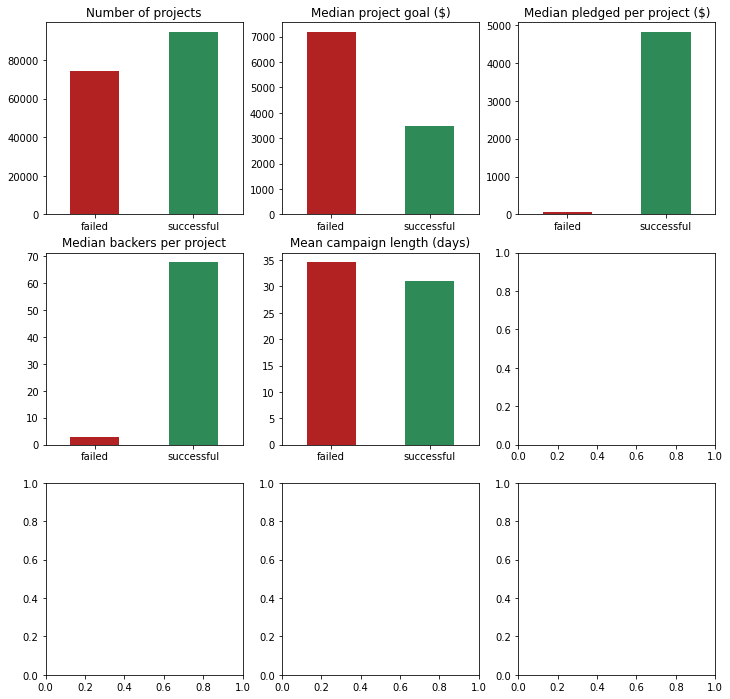

In [63]:
# Plotting the average amount pledged to successful and unsuccesful projects
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

trimmed_frame['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

trimmed_frame.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

trimmed_frame.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

trimmed_frame.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')

trimmed_frame.groupby('state').campaign_days.mean().plot(kind='bar', ax=ax5, color=['firebrick', 'seagreen'], rot=0)
ax5.set_title('Mean campaign length (days)')
ax5.set_xlabel('')

Text(0.5, 463.6611764705883, '')